## Daniela Porras IS362
## Project 3 – Chinook Database Analysis
In this notebook, I will connect to the Chinook SQLite database using Python. The Chinook database contains information about a digital music store, including data on artists, albums, tracks, customers, invoices, and employees.

The goal of this project is to:

Connect to the Chinook database using SQLite.

Write and execute a SQL query that joins five different tables.

Read the query results into a pandas DataFrame.

Analyze and explore the data to gain useful insights.

This project demonstrates how Python can interact with relational databases for real-world data analysis.

# Step 1
In this step, I connect to the Chinook SQLite database using the sqlite3 library. After successfully connecting, I run a query to retrieve a list of all the tables in the database. This helps confirm that the connection works and gives an overview of what data is available for analysis. 

In [1]:
import sqlite3
import pandas as pd

# Connect to the Chinook SQLite database
conn = sqlite3.connect("Chinook_Sqlite.sqlite")

# Test: Get the list of tables
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)
tables

,name
0,Album
1,Artist
2,Customer
3,Employee
4,Genre
5,Invoice
6,InvoiceLine
7,MediaType
8,Playlist
9,PlaylistTrack


# Step 2 
In this step, I write a SQL query to join five related tables: InvoiceLine, Invoice, Customer, Employee, and Track. This allows me to retrieve detailed invoice information, including the invoice date, customer and support rep names, track purchased, unit price, quantity, and total amount. The result is loaded into a pandas DataFrame for further analysis.

In [6]:
# Write SQL query to join five tables and get useful information
query = '''
SELECT
  c.LastName,
  c.FirstName,
  t.Name AS TrackName,
  al.Title AS AlbumTitle
FROM Customer c
JOIN Invoice i ON c.CustomerId = i.CustomerId
JOIN InvoiceLine il ON i.InvoiceId = il.InvoiceId
JOIN Track t ON il.TrackId = t.TrackId
JOIN Album al ON t.AlbumId = al.AlbumId
ORDER BY c.LastName, c.FirstName
'''

# Execute the query and load the results into a pandas DataFrame
results_df = pd.read_sql(query, conn)

# Show the first few rows
results_df.head()

,LastName,FirstName,TrackName,AlbumTitle
0,Almeida,Roberto,Right Next Door to Hell,Use Your Illusion I
1,Almeida,Roberto,In The Evening,In Through The Out Door
2,Almeida,Roberto,Fool In The Rain,In Through The Out Door
3,Almeida,Roberto,Saudade Dos Aviões Da Panair (Conversando No Bar),Minas
4,Almeida,Roberto,Caso Você Queira Saber,Minas


# Step 3
In this step, I will explore the query results using pandas and matplotlib. I’ll summarize total sales and visualize the top-selling tracks based on total revenue. This helps identify which music tracks are generating the most income for the store.

In [7]:
# Step 3.1 - Count how many times each track was purchased

# Count purchases for each track
track_counts = results_df['TrackName'].value_counts().head(10)

# Display the top 10 most purchased tracks
track_counts

TrackName
The Trooper                5
The Number Of The Beast    4
Hallowed Be Thy Name       4
Untitled                   4
Eruption                   4
Sure Know Something        4
Brasil                     3
Heaven Can Wait            3
Good Golly Miss Molly      3
Linha Do Equador           3
Name: count, dtype: int64

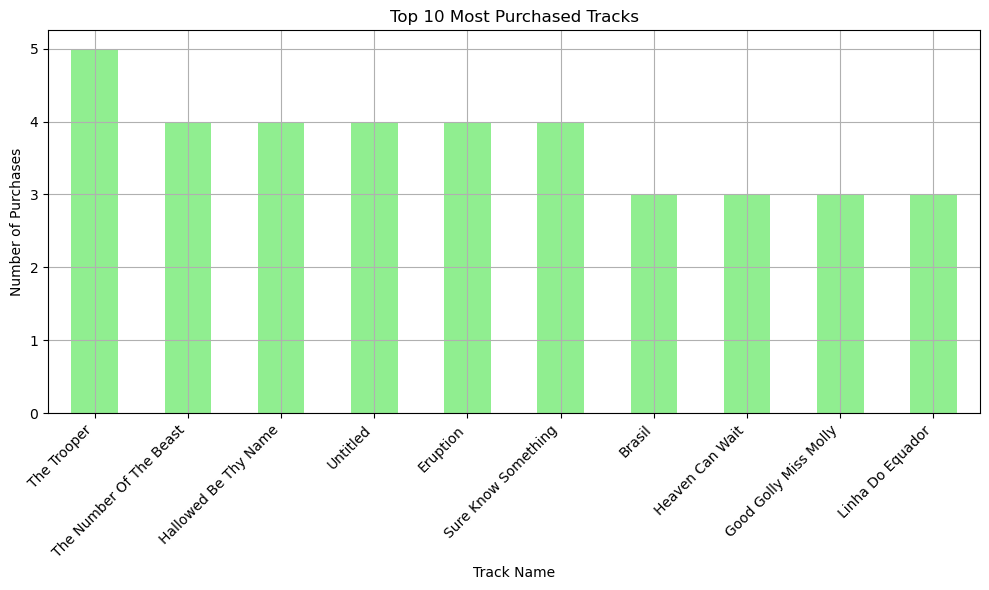

In [8]:
# Step 3.2 - Bar Chart of Top 10 Most Purchased Tracks
import matplotlib.pyplot as plt

# Plot the top 10 purchased tracks
plt.figure(figsize=(10,6))
track_counts.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Purchased Tracks')
plt.xlabel('Track Name')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

# Top 10 Most Purchased Tracks
This bar chart displays the top 10 tracks with the highest number of purchases based on the Chinook database. Instead of analyzing revenue, this visualization focuses on the frequency of purchases, showing which tracks appear most often in customer invoices.

The y-axis represents the number of purchases for each track, while the x-axis lists the track names. From the chart, we can see that "The Trooper" was the most purchased track, followed by others like "The Number of the Beast" and "Hallowed Be Thy Name".

This analysis helps identify popular music choices among customers, which could be useful for marketing, playlist curation, or targeted promotions. Even without revenue data, purchase frequency gives meaningful insight into consumer preferences.

# Conclusion

In this project, I successfully connected to the Chinook SQLite database using Python and performed a multi-table SQL join across five tables: Customer, Invoice, InvoiceLine, Track, and Album. This allowed me to retrieve detailed purchase data for each customer, including track names and album titles. Using pandas, I loaded the results into a DataFrame and conducted further analysis.

One of the key insights was identifying the Top 10 Most Purchased Tracks in the dataset. This analysis helps highlight which songs were most popular with customers, and such information can be useful for marketing, inventory planning, or artist promotion strategies in a digital music store context.

Overall, this project demonstrates how Python can be effectively used to connect to a relational database, execute complex queries, and visualize results — all essential skills for data analysis in real-world scenarios.